Deserialised process graph into nested structure


Walking node root-9309e338-8438-48ef-9fa3-bf82b8b4a53d
Walking node filterspatial1-9309e338-8438-48ef-9fa3-bf82b8b4a53d
Walking node loadcollection1-9309e338-8438-48ef-9fa3-bf82b8b4a53d


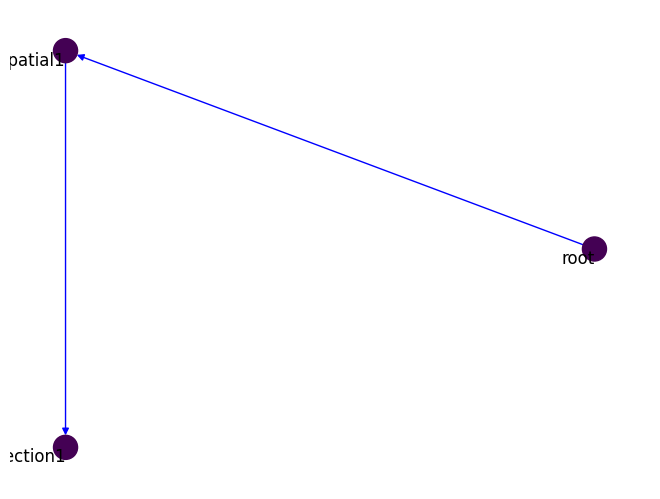

In [1]:
from eodc_pg_parser.graph import OpenEOProcessGraph
import json

flat_graph = json.load(open("../tests/data/filter_spatial.json", mode="r"))
parsed_graph = OpenEOProcessGraph(pg_data=flat_graph)

parsed_graph.plot()

## Executor

In [2]:
from eodc_pg_parser.executor import OpenEOExecutor
from eodc_pg_parser.process_registry import process_registry


In [3]:
for node in parsed_graph:
    print(node)

loadcollection1-9309e338-8438-48ef-9fa3-bf82b8b4a53d
filterspatial1-9309e338-8438-48ef-9fa3-bf82b8b4a53d
root-9309e338-8438-48ef-9fa3-bf82b8b4a53d


In [4]:
executor = OpenEOExecutor(parsed_graph, process_registry)
node_callable = executor._map_node_to_callable(parsed_graph.result_node)

{'bands': ['B02', 'B03', 'B04', 'B05', 'B08'], 'id': 'boa_sentinel_2', 'spatial_extent': {'west': 10.454955, 'east': 10.573729, 'south': 46.102185, 'north': 46.213657, 'crs': 'EPSG:4326'}, 'temporal_extent': ['2019-05-01', '2019-06-01']}
{'data': ResultReference(from_node='loadcollection1', node=ProcessNode(process_id='load_collection', namespace=None, result=False, description=None, arguments={'bands': ProcessArgument(__root__=['B02', 'B03', 'B04', 'B05', 'B08']), 'id': ProcessArgument(__root__='boa_sentinel_2'), 'spatial_extent': ProcessArgument(__root__={'west': 10.454955, 'east': 10.573729, 'south': 46.102185, 'north': 46.213657, 'crs': 'EPSG:4326'}), 'temporal_extent': ProcessArgument(__root__=['2019-05-01', '2019-06-01'])})), 'geometries': {'type': 'FeatureCollection', 'features': [{'geometry': {'type': 'Polygon', 'coordinates': [[[10.46, 46.102185], [10.57, 46.102185], [10.57, 46.15], [10.46, 46.13], [10.46, 46.102185]]]}}, {'geometry': {'type': 'Polygon', 'coordinates': [[[10.4

In [5]:
node_callable()

Ran load_collection with kwargs: {'kwargs': {'bands': ['B02', 'B03', 'B04', 'B05', 'B08'], 'id': 'boa_sentinel_2', 'spatial_extent': {'west': 10.454955, 'east': 10.573729, 'south': 46.102185, 'north': 46.213657, 'crs': 'EPSG:4326'}, 'temporal_extent': ['2019-05-01', '2019-06-01']}}
Ran filter_spatial with kwargs: {'kwargs': {'data': 'load_collection', 'geometries': {'type': 'FeatureCollection', 'features': [{'geometry': {'type': 'Polygon', 'coordinates': [[[10.46, 46.102185], [10.57, 46.102185], [10.57, 46.15], [10.46, 46.13], [10.46, 46.102185]]]}}, {'geometry': {'type': 'Polygon', 'coordinates': [[[10.46, 46.18], [10.5, 46.18], [10.5, 46.2], [10.46, 46.19], [10.46, 46.18]]]}}], 'crs': {'type': 'name', 'properties': {'name': '4326'}}}}}
Ran save_result with kwargs: {'kwargs': {'data': 'filter_spatial', 'format': 'NetCDF', 'options': {}}}
